<a href="https://colab.research.google.com/github/userfromdarkside/ML-Projects/blob/main/used_car_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset's link: https://www.kaggle.com/datasets/kreeshrajani/used-car-price-dataset

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_csv('used_car_dataset.csv')
df.shape

(2105, 6)

In [74]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [76]:
df.isnull().sum()

,0
car_name,0
car_price_in_rupees,0
kms_driven,0
fuel_type,0
city,0
year_of_manufacture,0


In [77]:
df.insert(2, "rupees_price", df["car_price_in_rupees"].str.split(" ").str[1])
df.head()

,car_name,car_price_in_rupees,rupees_price,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,4.45,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,2.93,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,22.49,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,6.95,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,12,"11,193 km",Petrol,Kolkata,2019


In [78]:
df = df.drop(['car_price_in_rupees'], axis=1)

In [79]:
df.insert(3, "kms", df["kms_driven"].str.split(" ").str[0])
df = df.drop(['kms_driven'],axis=1)

In [80]:
df['rupees_price'] = pd.to_numeric(df['rupees_price'].str.replace(',','')) # Remove commas before converting to numeric
df['kms'] = pd.to_numeric(df['kms'].str.replace(',','')) # Remove commas before converting to numeric

In [81]:
df['year_of_manufacture'] = pd.to_numeric(df['year_of_manufacture'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   rupees_price         2105 non-null   float64
 2   kms                  2105 non-null   int64  
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 98.8+ KB


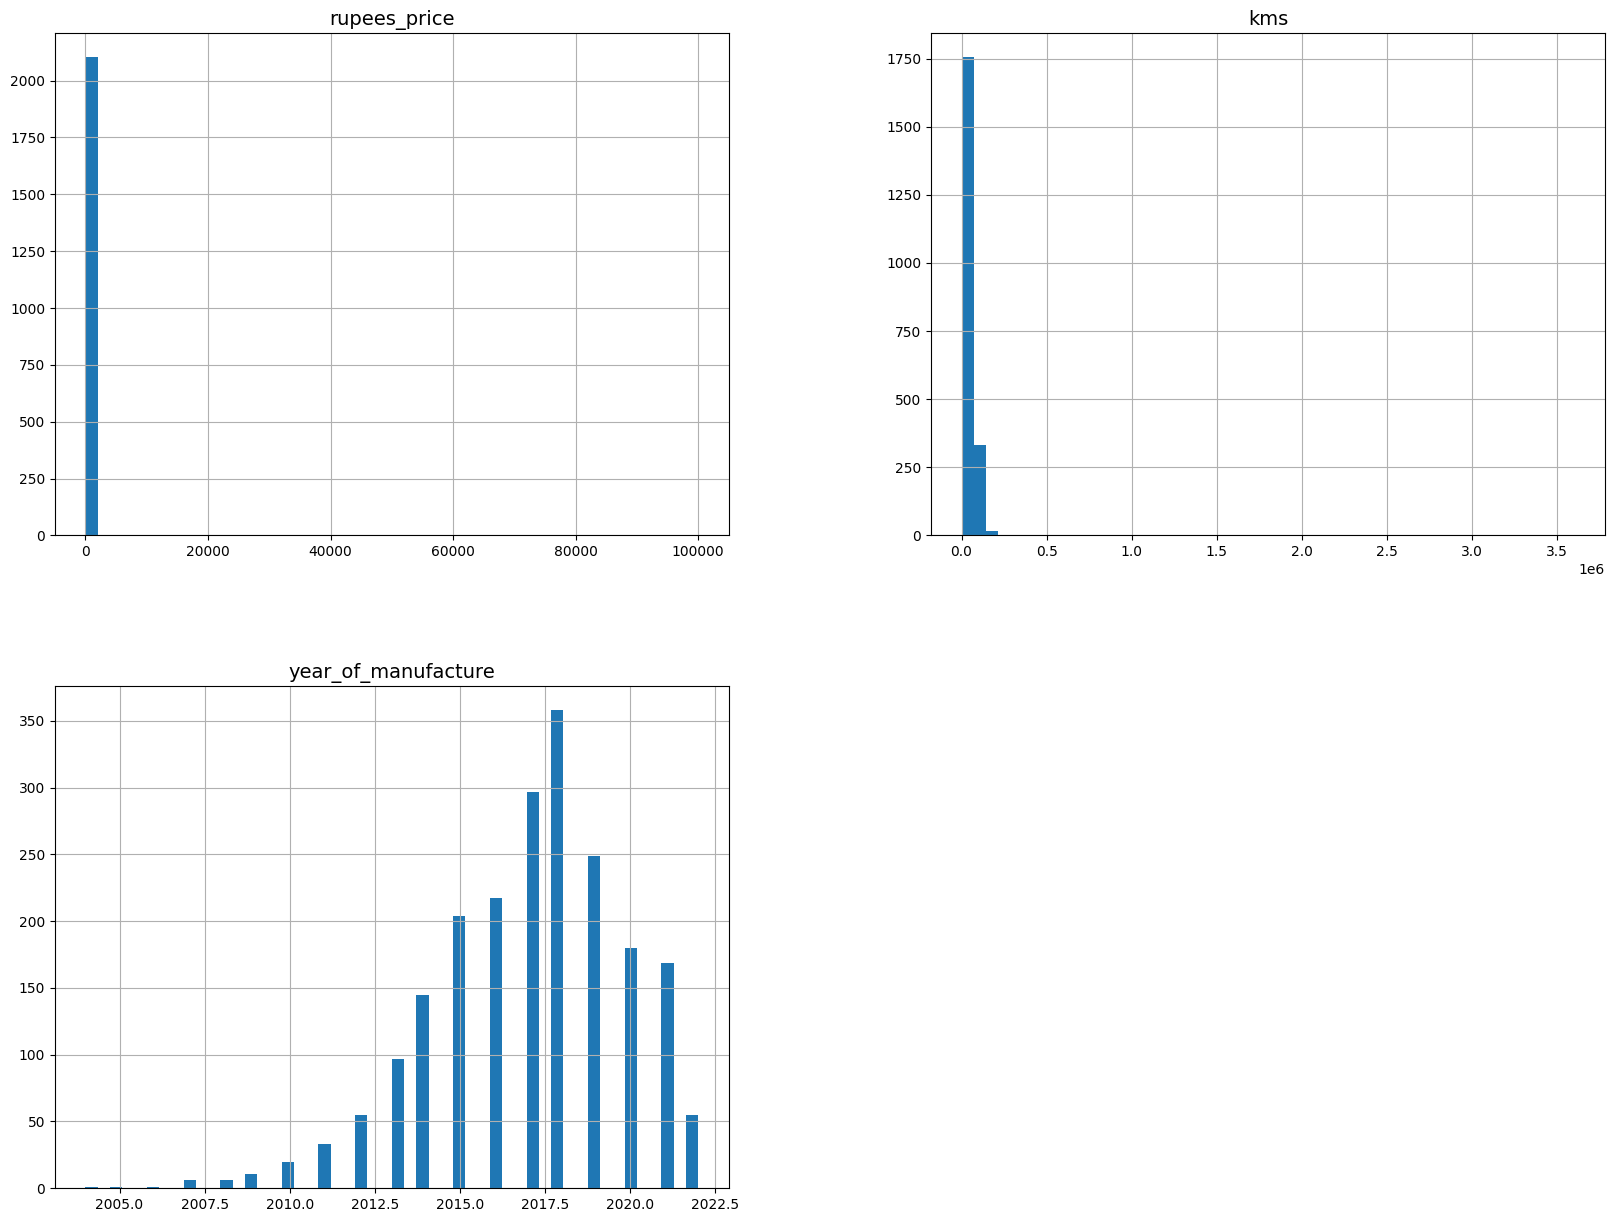

In [83]:
df.hist(bins=50, figsize=(20,15))
plt.show()

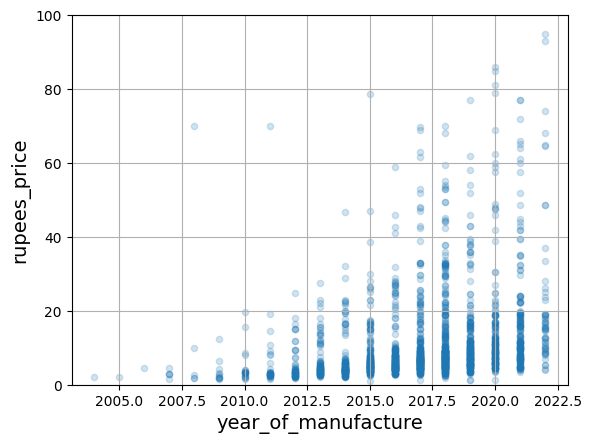

In [84]:
df.plot(kind='scatter', x='year_of_manufacture', y='rupees_price', alpha=0.2, grid=True)
plt.ylim(0,100)
plt.show()

In [85]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['rupees_price'].sort_values(ascending=False)

,rupees_price
rupees_price,1.000000
kms,-0.004079
year_of_manufacture,-0.098466


In [86]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state=42)
outliers = isolation_forest.fit_predict(df[['year_of_manufacture', 'kms', 'rupees_price']])
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)

In [88]:
# df = df.iloc[outliers == 1]
# df_labels = df.iloc[outliers == 1]
# Run if want to drop outliers

In [89]:
x_train = train_set.drop('rupees_price', axis=1)
y_train = train_set['rupees_price'].copy()
x_test = test_set.drop('rupees_price', axis=1)
y_test = test_set['rupees_price'].copy()

In [90]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [91]:
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [92]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [93]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7964fed5f2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7964fed5ef80>)])),
                ('linearregression', LinearRegression())])

In [94]:
lin_reg_prediction = lin_reg.predict(x_train)
lin_reg_prediction[100:105]

array([13.49994708, 10.20003326,  3.7003729 , 18.61874453,  7.61016349])

In [95]:
y_train[100:105]

,rupees_price
678,13.50
552,10.20
781,3.70
479,19.25
617,7.61


In [96]:
from sklearn.metrics import mean_squared_error
lin_reg_mse = mean_squared_error(y_train, lin_reg_prediction, squared = False)
lin_reg_mse

1.2420488101965823

In [97]:
from sklearn.tree import DecisionTreeRegressor
tre_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tre_reg.fit(x_train,y_train)
tre_reg_prediction = tre_reg.predict(x_train)
tre_reg_mse = mean_squared_error(y_train, tre_reg_prediction, squared=False)
tre_reg_mse

0.0

In [98]:
from sklearn.ensemble import RandomForestRegressor
ran_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
ran_reg.fit(x_train,y_train)
ran_reg_prediction = ran_reg.predict(x_train)
ran_reg_mse = mean_squared_error(y_train, ran_reg_prediction, squared = False)
ran_reg_mse

912.6865592112648

In [99]:
# using cross_validation for better evaluation
from sklearn.model_selection import cross_val_score
lin_reg_score = -cross_val_score(lin_reg, x_train, y_train,
                                scoring = 'neg_root_mean_squared_error', cv=10)
pd.Series(lin_reg_score).describe()

,0
count,10.000000
mean,1284.738353
std,2572.579240
min,104.842068
25%,108.643351
50%,111.895221
75%,119.273004
max,7473.888666


In [100]:
tre_reg_score = -cross_val_score(tre_reg, x_train, y_train,
                                 scoring='neg_root_mean_squared_error',cv=10)
pd.Series(tre_reg_score).describe()

,0
count,10.000000
mean,1204.032414
std,2613.335752
min,7.525112
25%,10.044395
50%,11.162271
75%,12.110862
max,7473.496440


In [101]:
ran_reg_score = -cross_val_score(ran_reg, x_train, y_train,
                                 scoring='neg_root_mean_squared_error', cv=10)
pd.Series(ran_reg_score).describe()

,0
count,10.000000
mean,1215.138787
std,2607.908837
min,7.287359
25%,9.404062
50%,10.713784
75%,98.372847
max,7473.510573


In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42)),
])
param_distribs = {
    'random_forest__n_estimators': randint(low=1, high=200),
    'random_forest__max_features': randint(low=1, high=8),
}
rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7964fed5f2b0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strate...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7964fed5ef80>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7964fed44a60>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7965050af850>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [103]:
final_model = rnd_search.best_estimator_
feature_importances = final_model.named_steps['random_forest'].feature_importances_
feature_importances.round(3)

array([0.136, 0.25 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.001, 0.001, 0.   , 0.   , 0.001, 0.   ,
       0.004, 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.002, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [104]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.2592008374145389, 'pipeline-2__car_name_Maruti Suzuki Estilo LXi'),
 (0.24984716019411038, 'pipeline-1__year_of_manufacture'),
 (0.13576376007619265, 'pipeline-1__kms'),
 (0.11058571688046337, 'pipeline-2__car_name_Tata Indica V2 DLE BS-III'),
 (0.0424983784855655, 'pipeline-2__city_Pallikarnai'),
 (0.02626926559851654, 'pipeline-2__city_Kolkata'),
 (0.02102867014134664, 'pipeline-2__city_Hyderabad'),
 (0.01825898619686007, 'pipeline-2__fuel_type_Petrol'),
 (0.017245651329173467, 'pipeline-2__fuel_type_Diesel'),
 (0.005142933790018628,
  'pipeline-2__car_name_Maruti Suzuki Wagon R LXi Minor'),
 (0.004832583633715798, 'pipeline-2__fuel_type_Petrol + 1'),
 (0.004367251060051616, 'pipeline-2__city_Ahmedabad'),
 (0.0040846585348648795, 'pipeline-2__car_name_BMW 7 Series 750Li Sedan'),
 (0.003830734203152139, 'pipeline-2__car_name_Mercedes-Benz E-Class 280'),
 (0.003475234724514793,
  'pipeline-2__car_name_MG Hector Sharp 1.5 Petrol Turbo Hybrid MT'),
 (0.003429032669370012, 'pipeline-2

In [105]:
final_prediction = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_prediction, squared=False)
final_mse

319.7701801670993

Now my model is ready to make predictions